In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

## data

In [ ]:
!curl -L "https://public.roboflow.com/ds/kqR8ouO1iu?key=EyNsu0N5h7" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [4]:
!mkdir train/
!mkdir train/images
!mkdir train/labels
!mkdir valid/
!mkdir valid/images
!mkdir valid/labels
!mkdir test/
!mkdir test/images
!mkdir test/labels

In [5]:
import os
import shutil

# allImages = glob.glob("/export/images/*.jpg")
allImages = []
for filename in os.listdir("export/images/"):
    if filename.endswith(".jpg"):
      allImages.append(filename)
trainImages = []
valImages = []
trainLabels = []
valLabels = []
testImages = []
testLabels = []
print(len(allImages))
testCount = int(0.2 * len(allImages)/10)
trainCount = len(allImages)/10 - testCount-1
valCount = int(0.2 * trainCount)
trainCount = trainCount - valCount-1

print(trainCount, valCount, testCount)

# create training Dataset
j = 0
k = 0
for i in range(0,int(len(allImages)/10)):
  if i < trainCount: # create training images
    trainImages.append(allImages[i])
  elif i >= trainCount and i<(valCount + trainCount):
    valImages.append(allImages[i])
    # j += 1
  else:
    testImages.append(allImages[i])
    # k += 1

print(len(trainImages), len(valImages), len(testImages))

# moving training images
source = "export/images/"
destination = "train/images/"
for fileT in trainImages:
  shutil.move(source+fileT , destination+fileT)

source = "export/images/"
destination = "valid/images/"
for fileT in valImages:
  shutil.move(source+fileT , destination+fileT)

source = "export/images/"
destination = "test/images/"
for fileT in testImages:
  shutil.move(source+fileT , destination+fileT)

# moving labels
source = "export/labels/"
destination = "train/labels/"
for fileT in trainImages:
  fileT = fileT.replace(".jpg",".txt")
  shutil.move(source+fileT , destination+fileT)

source = "export/labels/"
destination = "valid/labels/"
for fileT in valImages:
  fileT = fileT.replace(".jpg",".txt")
  shutil.move(source+fileT , destination+fileT)

source = "export/labels/"
destination = "test/labels/"
for fileT in testImages:
  fileT = fileT.replace(".jpg",".txt")
  shutil.move(source+fileT , destination+fileT)



30000
1919.0 479 600
1919 479 602


In [6]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 11
names: ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

## model

In [7]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 8440, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 8440 (delta 72), reused 88 (delta 43), pack-reused 8286
Receiving objects: 100% (8440/8440), 9.57 MiB | 31.29 MiB/s, done.
Resolving deltas: 100% (5814/5814), done.


In [8]:
cd yolov5

/content/yolov5


In [10]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [12]:
!python train.py --img 640 --batch 40 --epochs 10 --data data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=40, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-318-g0ad6301 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective

In [13]:
!python detect.py --weights yolov5s.pt  --source  ../test/images/

detect: weights=['yolov5s.pt'], source=../test/images/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-318-g0ad6301 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/602 /content/yolov5/../test/images/14780

In [16]:
from IPython.display import Image, clear_output  # to display images

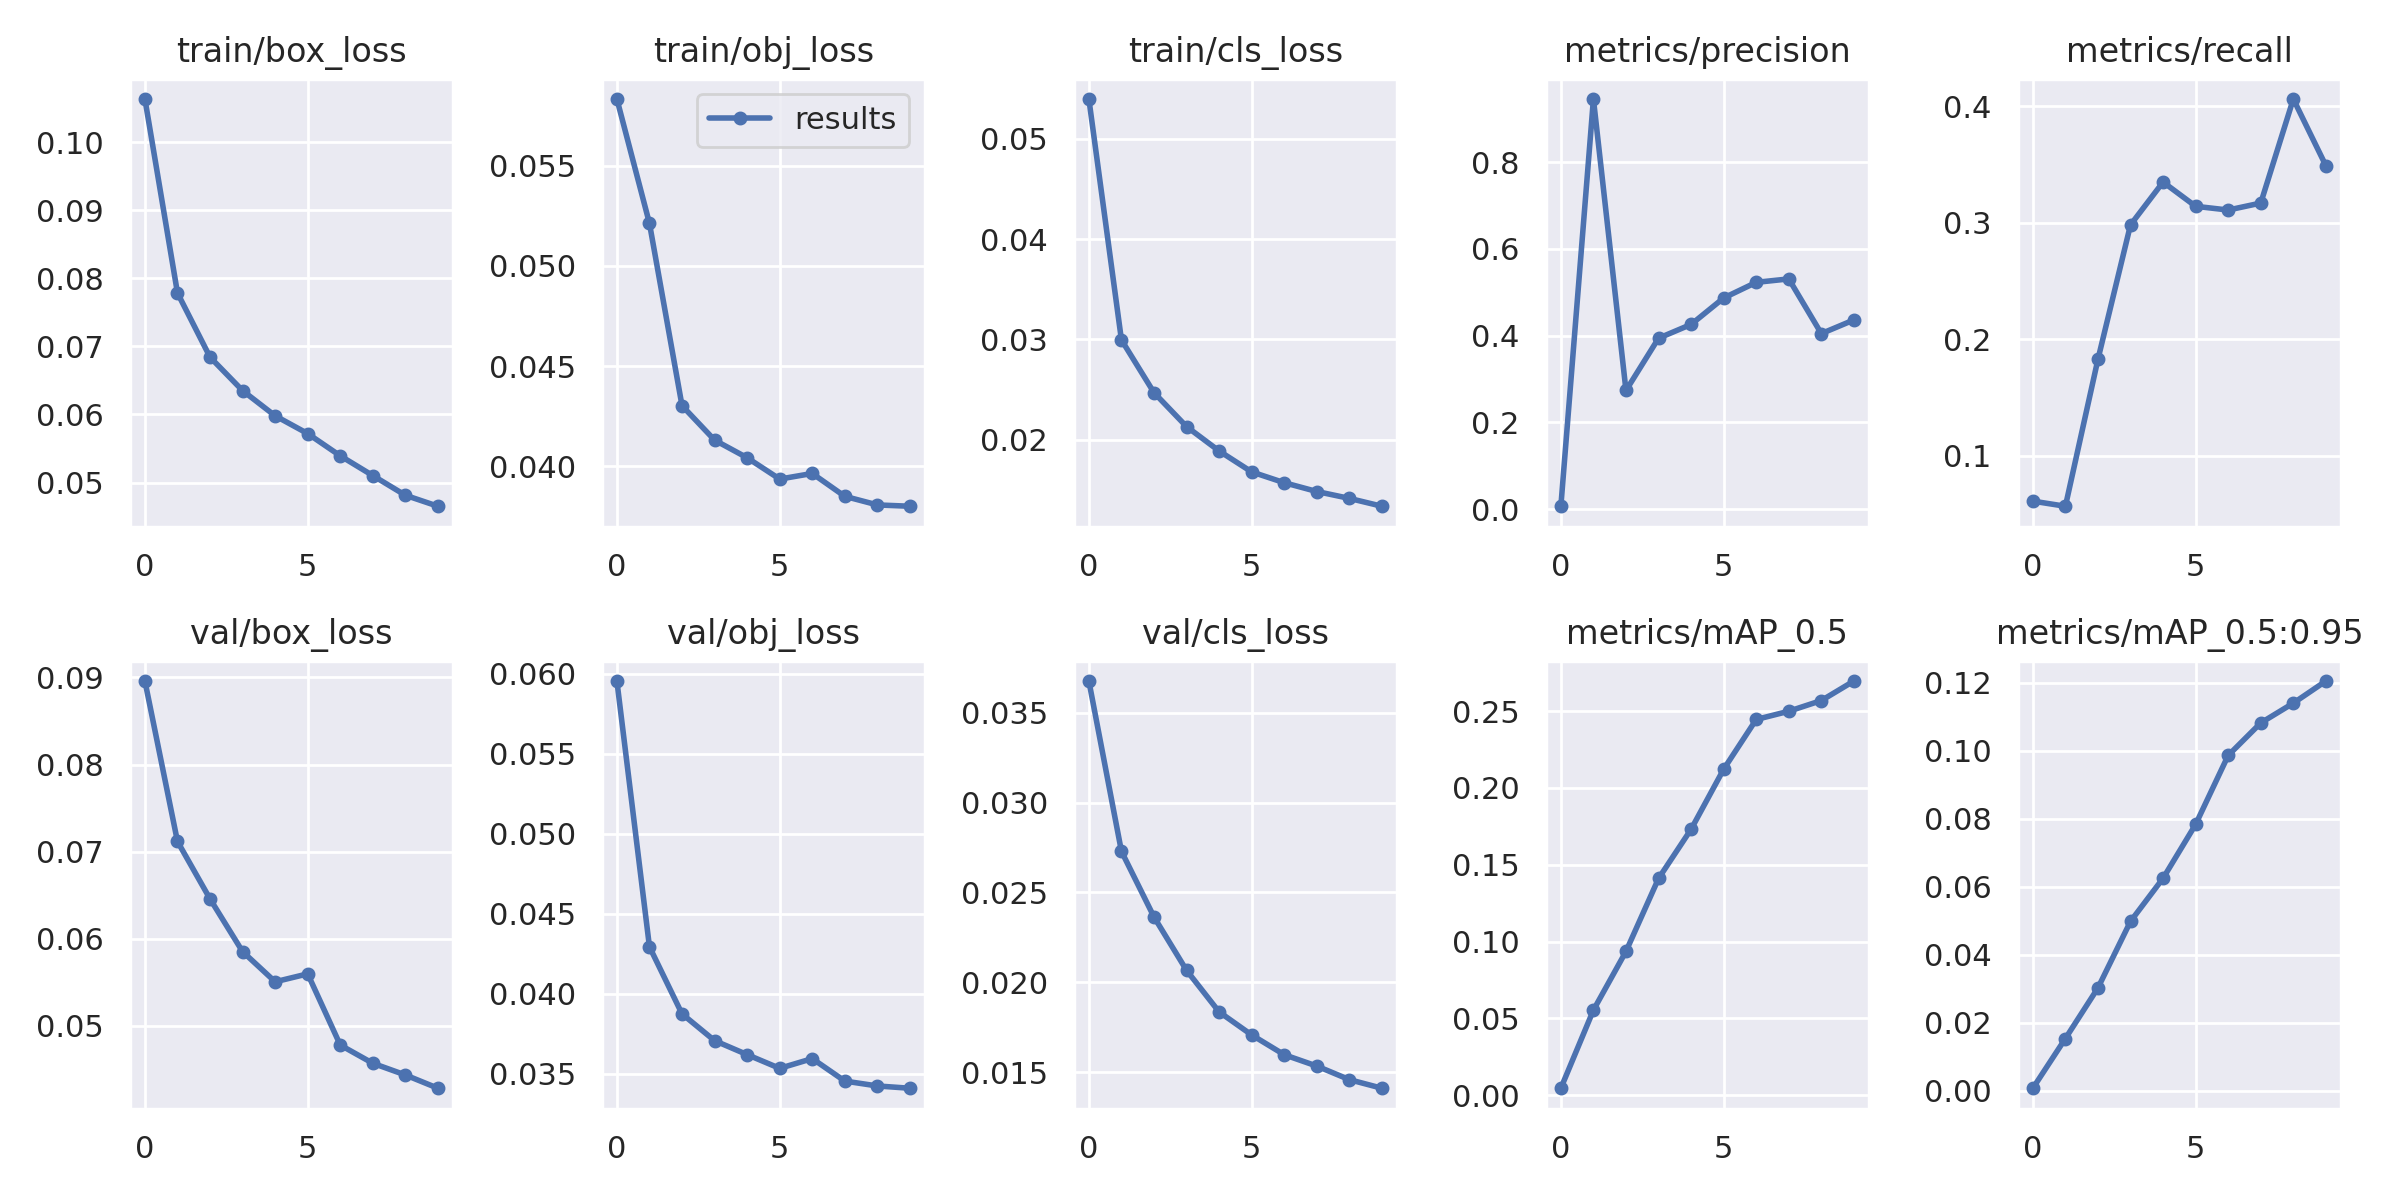

In [17]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='./runs/train/exp2/results.png', width=1000)  # view results.png

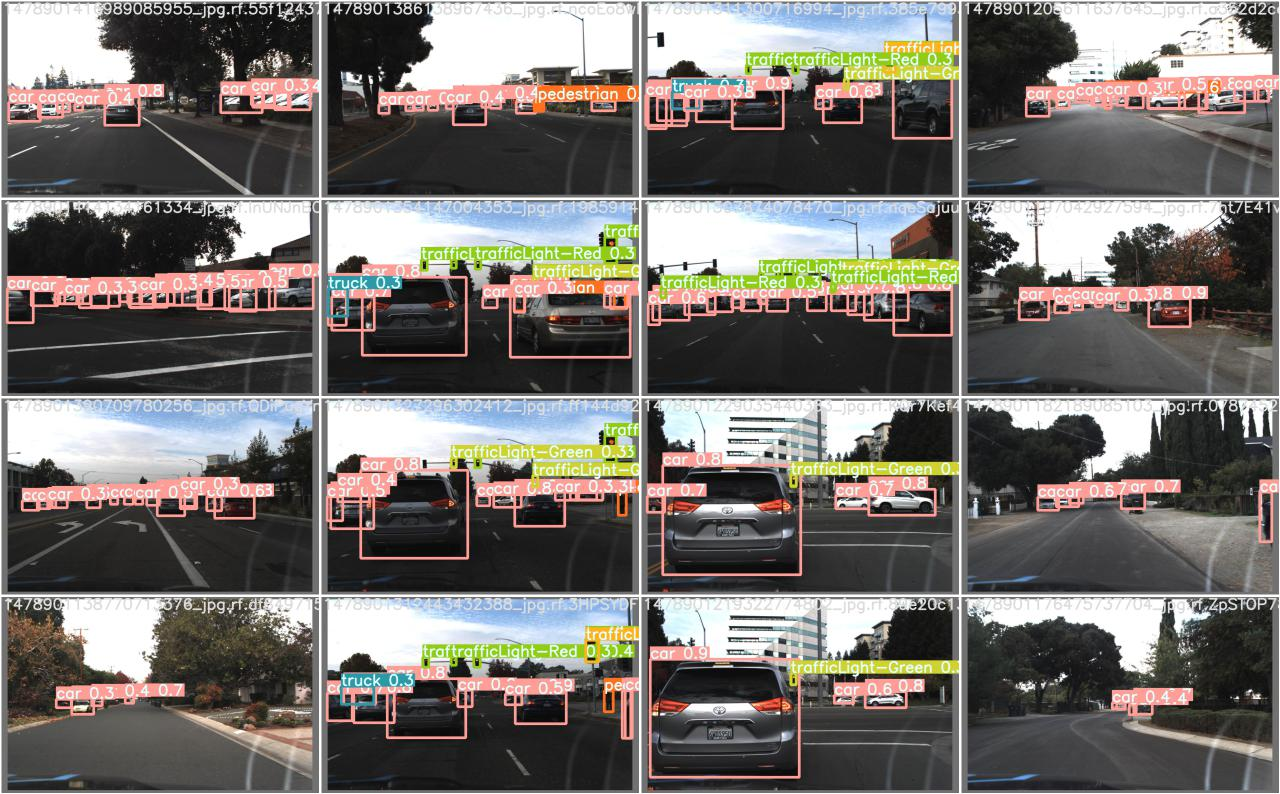

In [18]:
Image(filename='./runs/train/exp2/val_batch2_pred.jpg', width=1000)  # view results.png

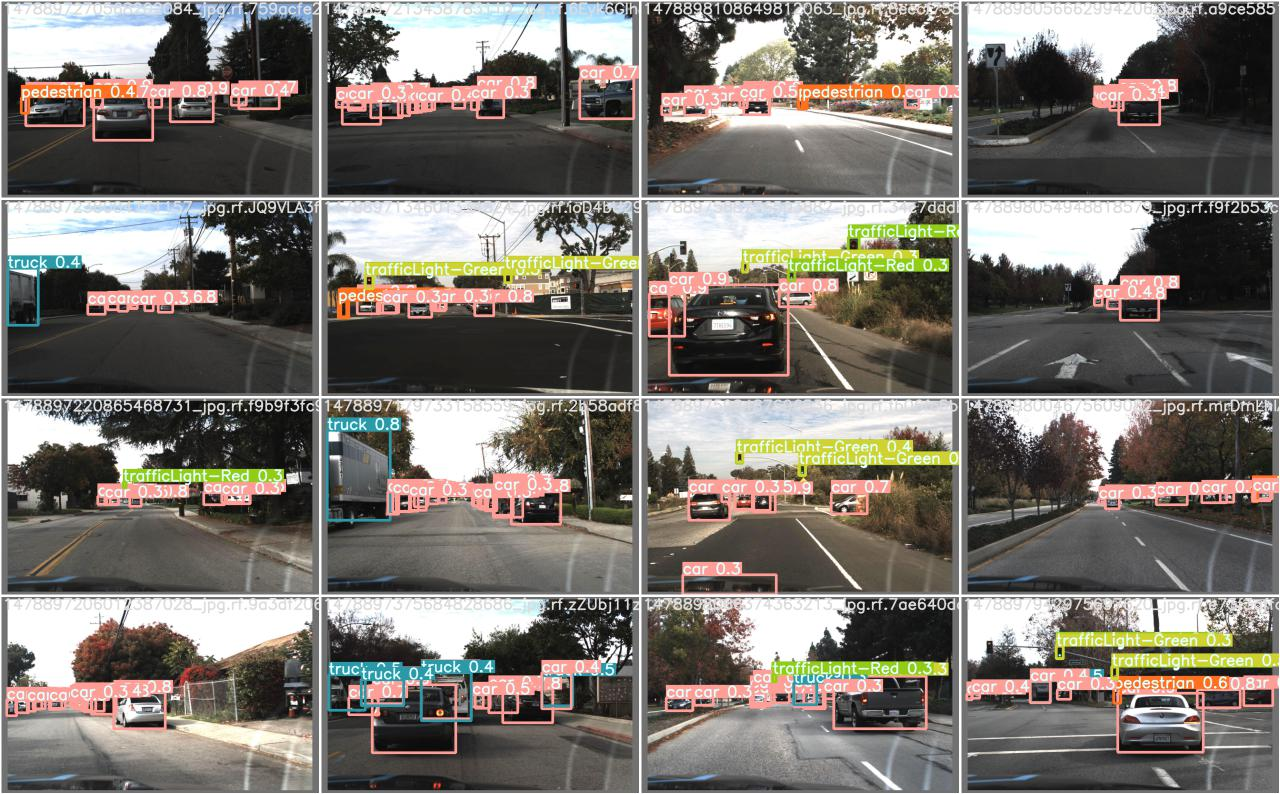

In [19]:
Image(filename='./runs/train/exp2/val_batch1_pred.jpg', width=1000)  # view results.png

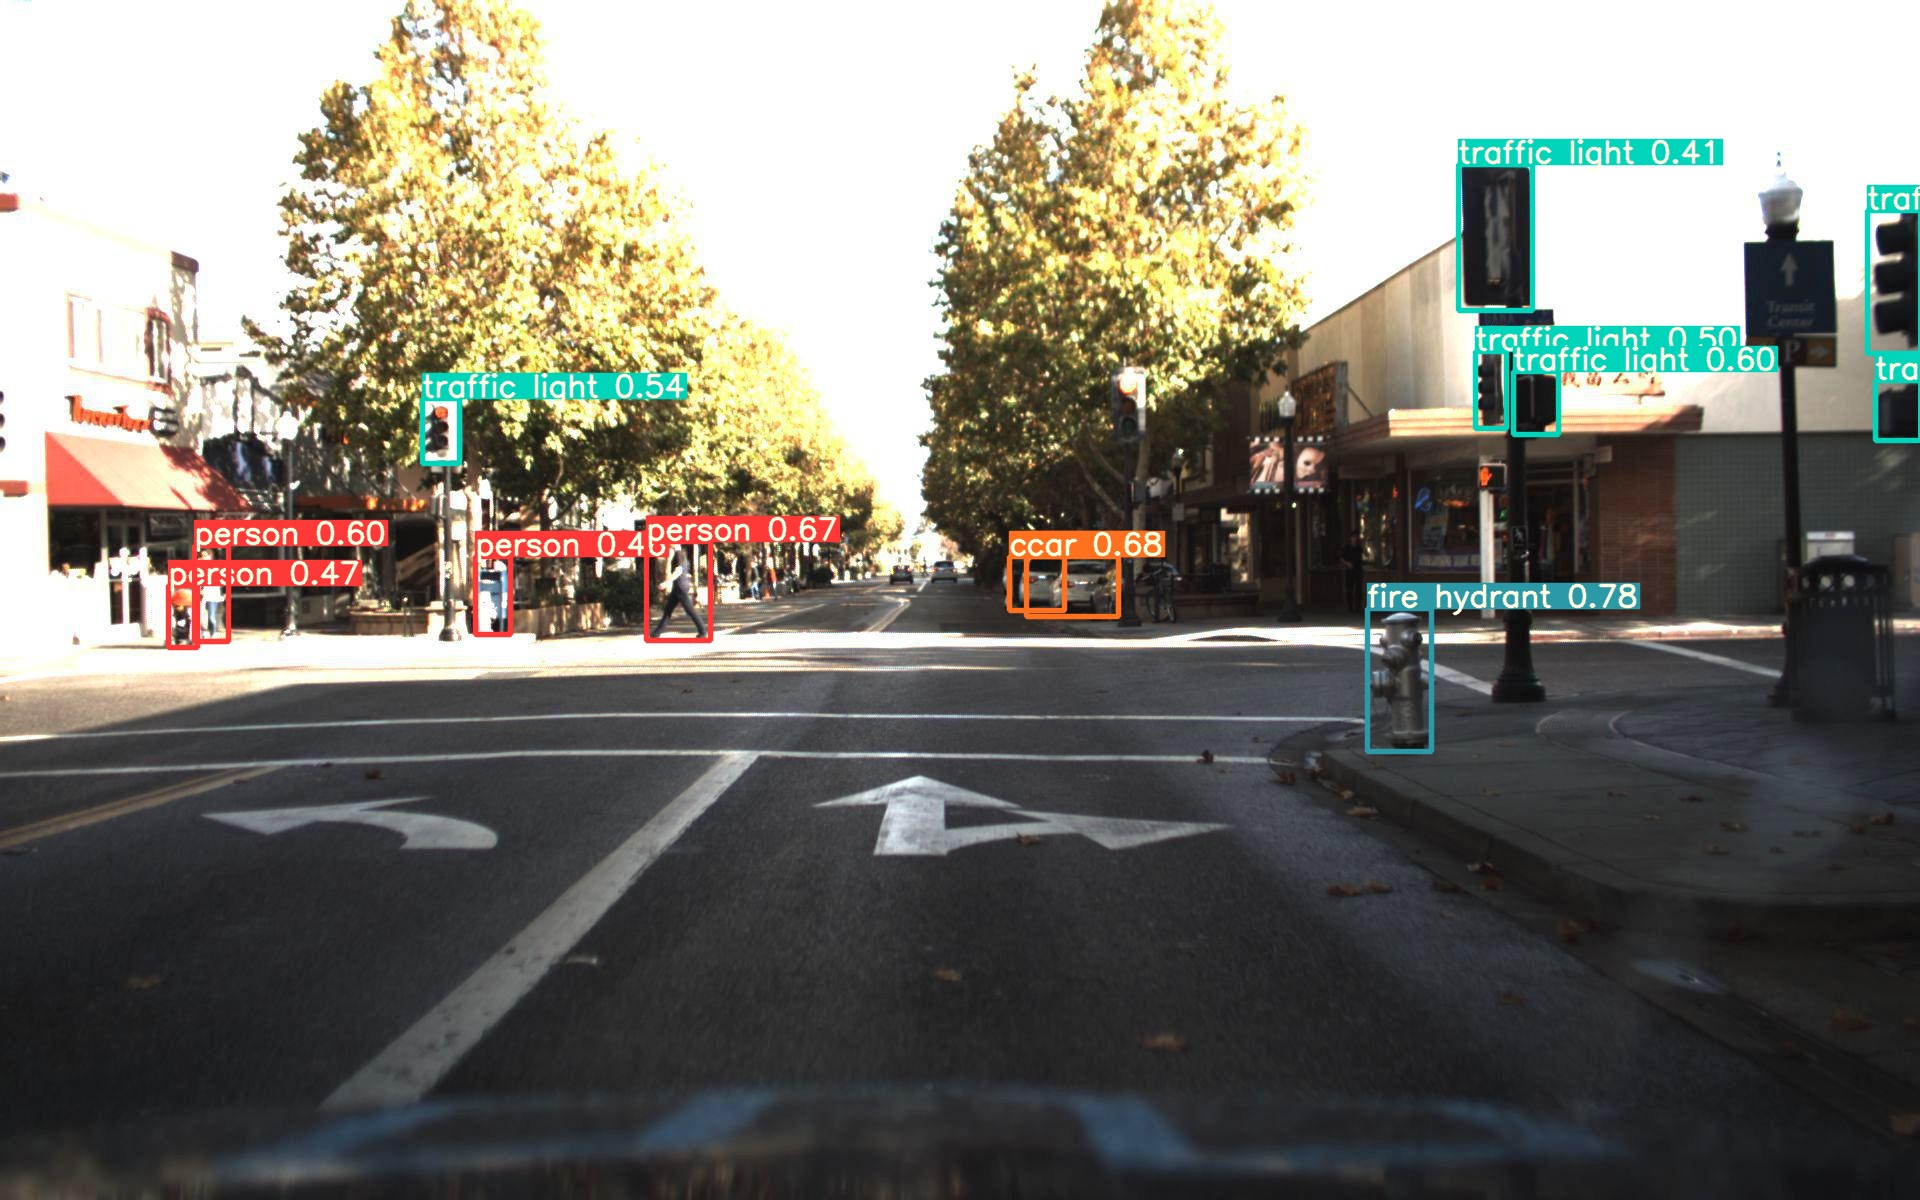

In [20]:
Image(filename='./runs/detect/exp/1478020344194617393_jpg.rf.0URscwOqCJVxZitIG033.jpg', width=1000)  # view results.png

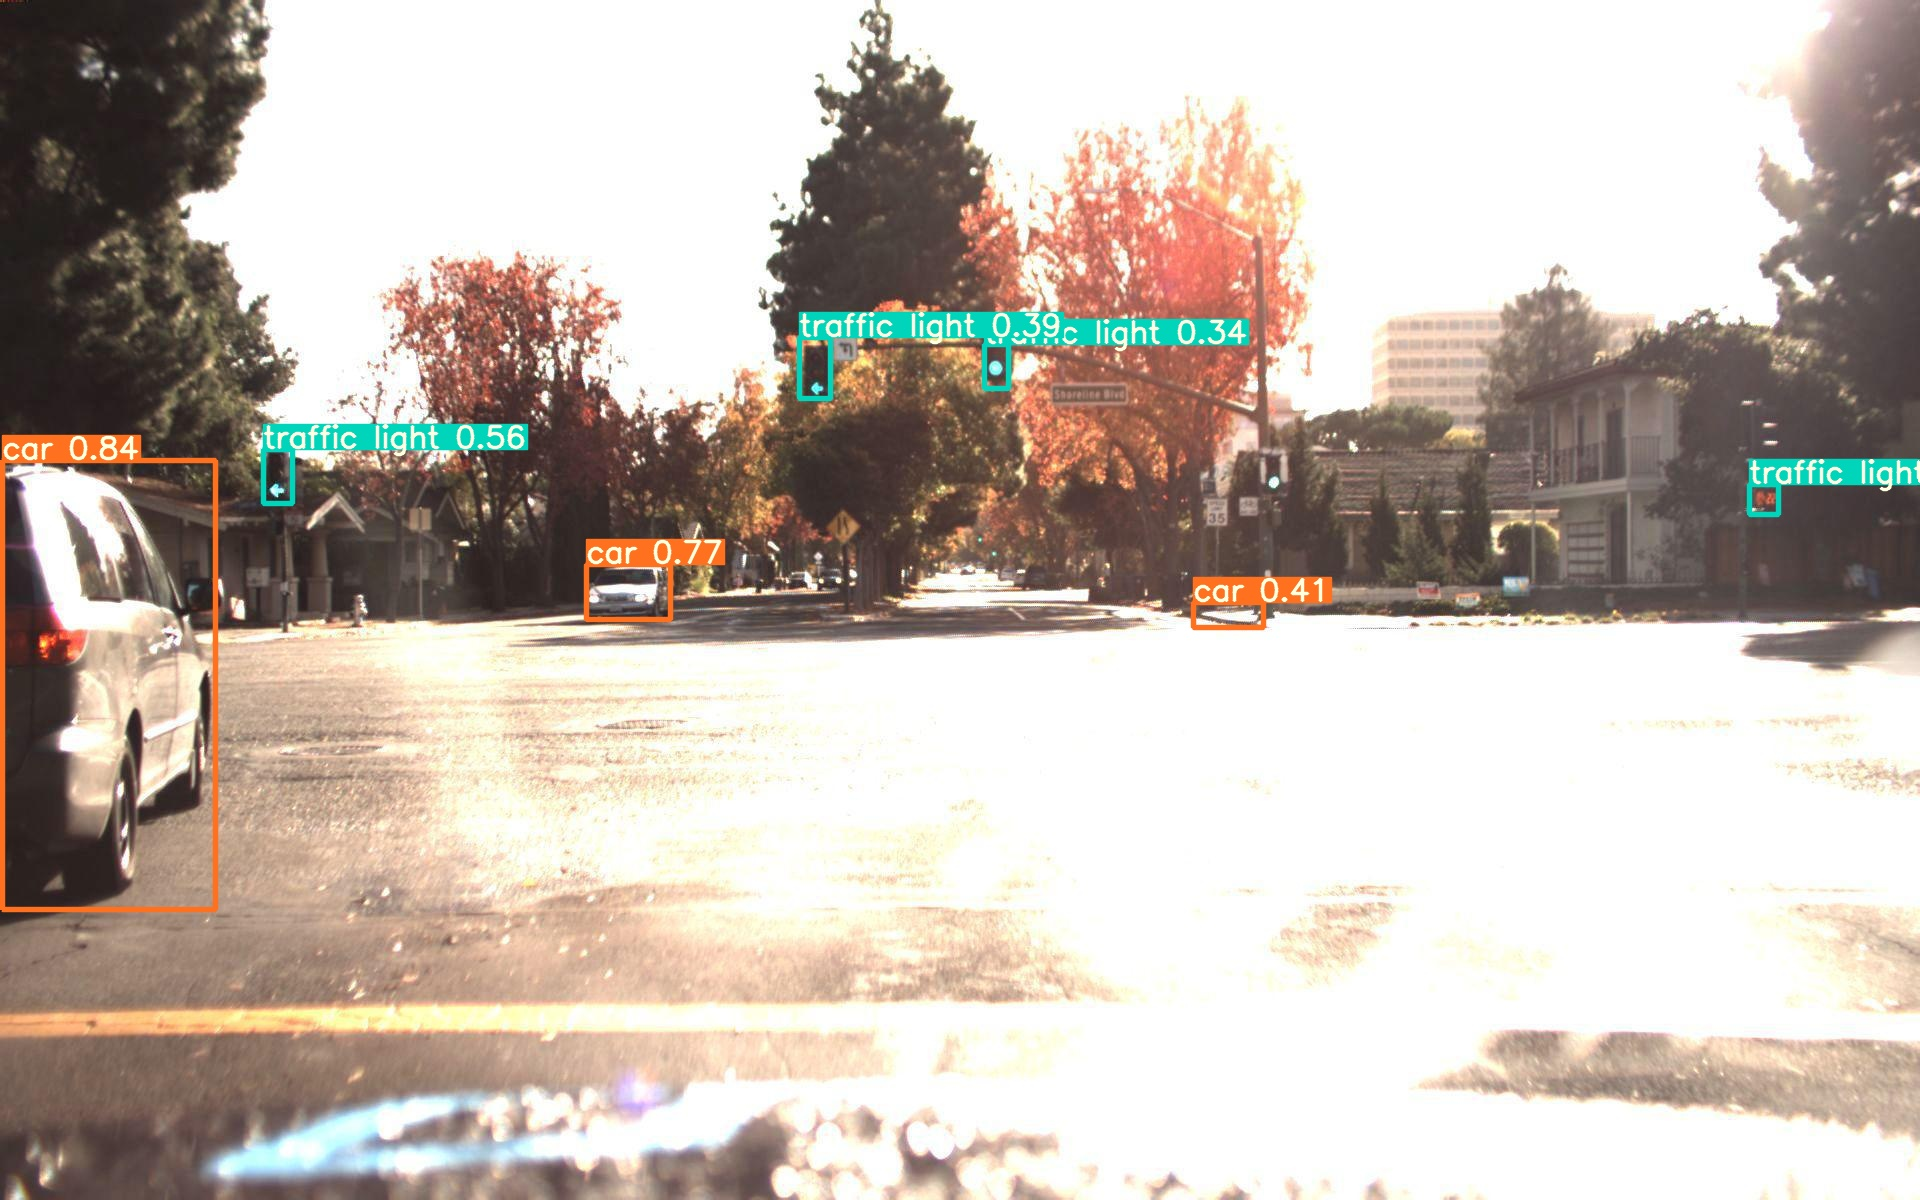

In [21]:
Image(filename='./runs/detect/exp/1478020213690861968_jpg.rf.83af37da1db5b004023fb49afc957124.jpg', width=1000)  # view results.png

In [22]:
!python detect.py --weights yolov5s.pt  --source  "https://www.youtube.com/watch?v=PSf09R3D7Lo"

detect: weights=['yolov5s.pt'], source=https://www.youtube.com/watch?v=PSf09R3D7Lo, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-318-g0ad6301 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
cv2.imshow() is disabled in Google Colab environments
1/1: https://www.youtube.com/watch?v=PSf09R3D7Lo... requirements: pafy not found and is required by YOLOv5, attempting auto-update...

requirements: youtube_dl not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per ['pafy', 'youtube_dl']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

 success